# Kohonen Implementation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Kohonen:
    def __init__(self, map_shape, learning_rate=0.1, sigma=1.0):
        self.map_shape = map_shape
        self.learning_rate = learning_rate
        self.sigma = sigma
        self.weights = np.random.rand(map_shape[0], map_shape[1], 2) # Initialize the weight matrix

    def find_best_matching_unit(self, input_vector):
        distances = np.linalg.norm(self.weights - input_vector, axis=2) # Euclidean distance between input_vector and each weight vector
        bmu_index = np.unravel_index(np.argmin(distances), distances.shape) # Find the index of the best matching unit (BMU)
        return bmu_index

    def update_weights(self, input_vector, bmu_index):
        distance_squares = np.sum((np.indices(self.map_shape) - np.array(bmu_index)[:, np.newaxis, np.newaxis]) ** 2, axis=0)
        neighborhood = np.exp(-distance_squares / (2 * self.sigma ** 2))
        self.weights += self.learning_rate * neighborhood[:, :, np.newaxis] * (input_vector - self.weights)

    def train(self, input_data, num_epochs):
        for epoch in range(num_epochs):
            np.random.shuffle(input_data)

            for input_vector in input_data:
                bmu_index = self.find_best_matching_unit(input_vector)
                self.update_weights(input_vector, bmu_index)

    def get_weights(self):
        return self.weights

### {(x, y)| 0<=x, y<=1} - Uniform

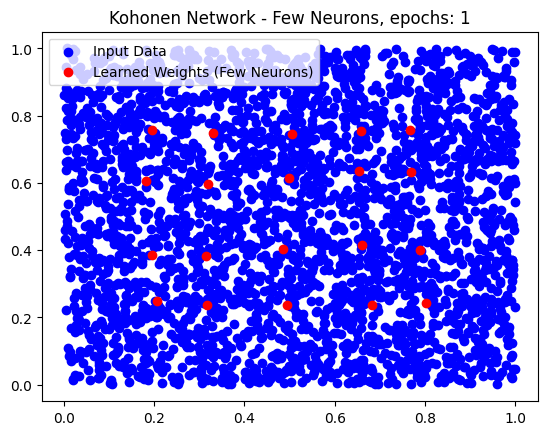

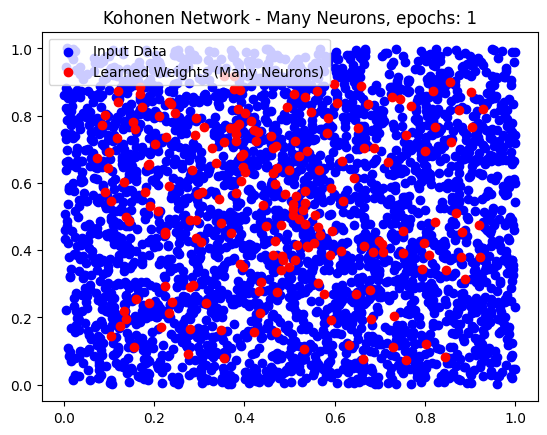

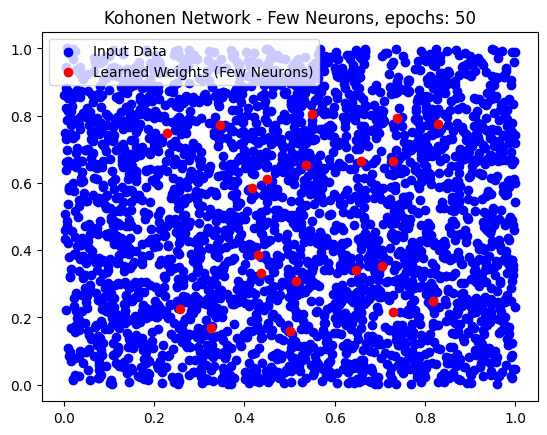

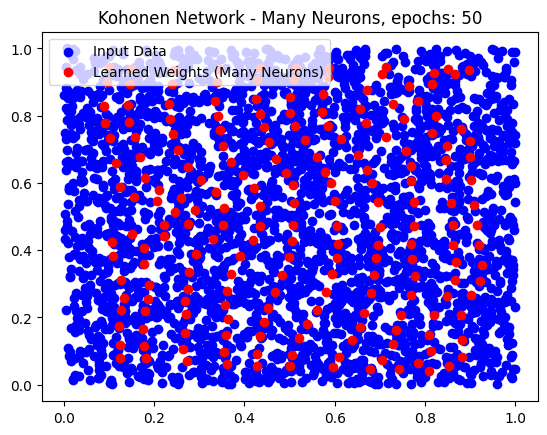

In [5]:
"""Uniform distribution of {(x, y) | x, y ∈ [0, 1]})}"""
# |x1 - x2| <|x1-x3| => |f(x1) - f(x2)| <|f(x1) - f(x3)|
epochs = [1, 50]
input_data = np.random.uniform(size=(3000, 2))

for epoch in epochs:

    kohonen_few_neurons = Kohonen(map_shape=(4, 5), learning_rate=0.1, sigma=1.0)
    kohonen_few_neurons.train(input_data, num_epochs=epoch)
    weights_few_neurons = kohonen_few_neurons.get_weights()

    kohonen_many_neurons = Kohonen(map_shape=(20, 10), learning_rate=0.1, sigma=1.0)
    kohonen_many_neurons.train(input_data, num_epochs=epoch)
    weights_many_neurons = kohonen_many_neurons.get_weights()


    plt.scatter(input_data[:, 0], input_data[:, 1], color='blue', label='Input Data')
    plt.scatter(weights_few_neurons[:, :, 0], weights_few_neurons[:, :, 1], color='red', label='Learned Weights (Few Neurons)')
    plt.title(f'Kohonen Network - Few Neurons, epochs: {epoch}')
    plt.legend(loc='upper left')
    plt.show()


    plt.scatter(input_data[:, 0], input_data[:, 1], color='blue', label='Input Data')
    plt.scatter(weights_many_neurons[:, :, 0], weights_many_neurons[:, :, 1], color='red', label='Learned Weights (Many Neurons)')
    plt.title(f'Kohonen Network - Many Neurons, epochs: {epoch}')
    plt.legend(loc='upper left')
    plt.show()


### {(x, y)| 0<=x, y<=1} - Normal

In [ ]:
epochs = [1, 50]
input_data = np.random.normal(loc=0.5, scale=0.2, size=(3000, 2))
input_data = np.clip(input_data, 0, 1)

for epoch in epochs:
    kohonen_few_neurons = Kohonen(map_shape=(4, 5), learning_rate=0.1, sigma=1.0)
    kohonen_few_neurons.train(input_data, num_epochs=epoch)
    weights_few_neurons = kohonen_few_neurons.get_weights()

    kohonen_many_neurons = Kohonen(map_shape=(200, 1), learning_rate=0.1, sigma=1.0)
    kohonen_many_neurons.train(input_data, num_epochs=epoch)
    weights_many_neurons = kohonen_many_neurons.get_weights()


    plt.scatter(input_data[:, 0], input_data[:, 1], color='blue', label='Input Data')
    plt.scatter(weights_few_neurons[:, :, 0], weights_few_neurons[:, :, 1], color='red', label='Learned Weights (Few Neurons)')
    plt.title(f'Kohonen Network - Few Neurons, epochs: {epoch}')
    plt.legend(loc='upper left')
    plt.show()


    plt.scatter(input_data[:, 0], input_data[:, 1], color='blue', label='Input Data')
    plt.scatter(weights_many_neurons[:, :, 0], weights_many_neurons[:, :, 1], color='red', label='Learned Weights (Many Neurons)')
    plt.title(f'Kohonen Network - Many Neurons, epochs: {epoch}')
    plt.legend(loc='upper left')
    plt.show()


### try #1

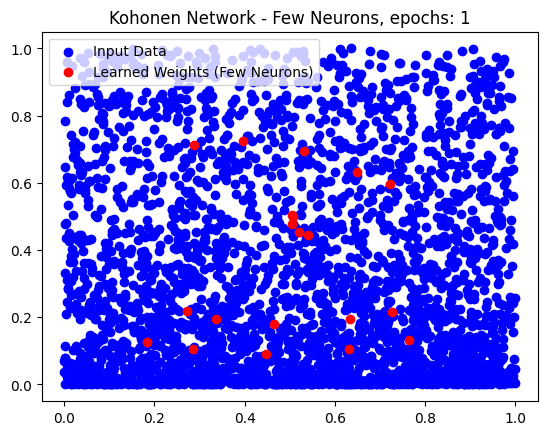

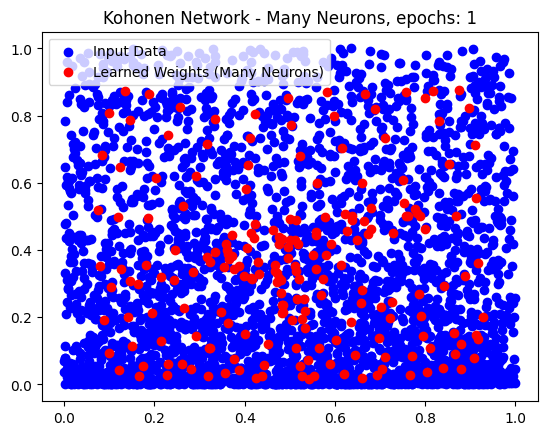

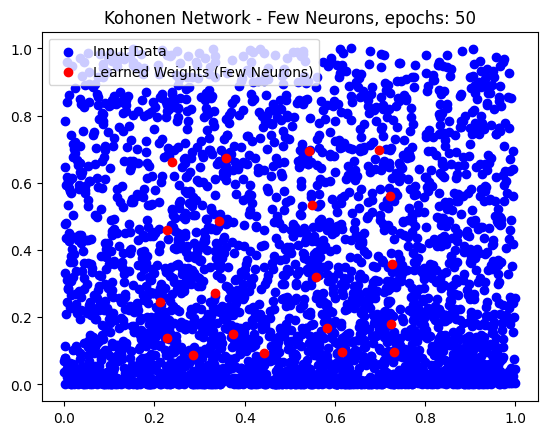

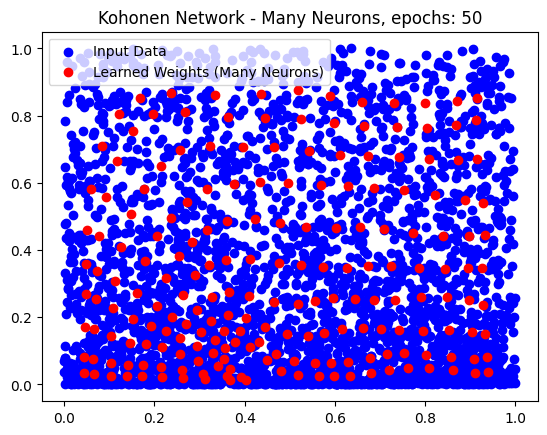

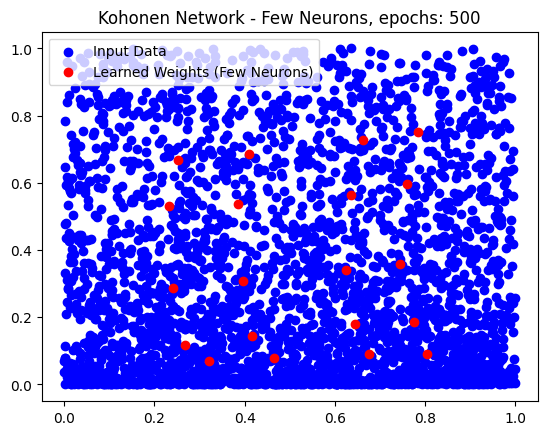

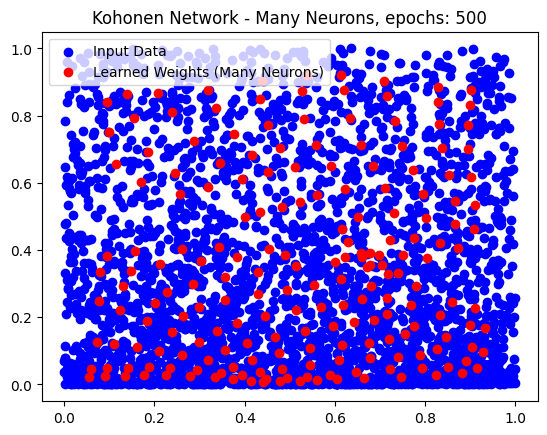

In [6]:
# Generate non-uniform distribution (Example 1)
x = np.random.uniform(size=3000)
y = np.random.uniform(size=3000)

input_data = np.column_stack((x, y**2))  # Squaring y to make the distribution non-uniform

# Rest of the code (same as before)
epochs = [1, 50, 500]

for epoch in epochs:
    kohonen_few_neurons = Kohonen(map_shape=(4, 5), learning_rate=0.1, sigma=1.0)
    kohonen_few_neurons.train(input_data, num_epochs=epoch)
    weights_few_neurons = kohonen_few_neurons.get_weights()

    kohonen_many_neurons = Kohonen(map_shape=(20, 10), learning_rate=0.1, sigma=1.0)
    kohonen_many_neurons.train(input_data, num_epochs=epoch)
    weights_many_neurons = kohonen_many_neurons.get_weights()

    plt.scatter(input_data[:, 0], input_data[:, 1], color='blue', label='Input Data')
    plt.scatter(weights_few_neurons[:, :, 0], weights_few_neurons[:, :, 1], color='red', label='Learned Weights (Few Neurons)')
    plt.title(f'Kohonen Network - Few Neurons, epochs: {epoch}')
    plt.legend(loc='upper left')
    plt.show()

    plt.scatter(input_data[:, 0], input_data[:, 1], color='blue', label='Input Data')
    plt.scatter(weights_many_neurons[:, :, 0], weights_many_neurons[:, :, 1], color='red', label='Learned Weights (Many Neurons)')
    plt.title(f'Kohonen Network - Many Neurons, epochs: {epoch}')
    plt.legend(loc='upper left')
    plt.show()


### try #2

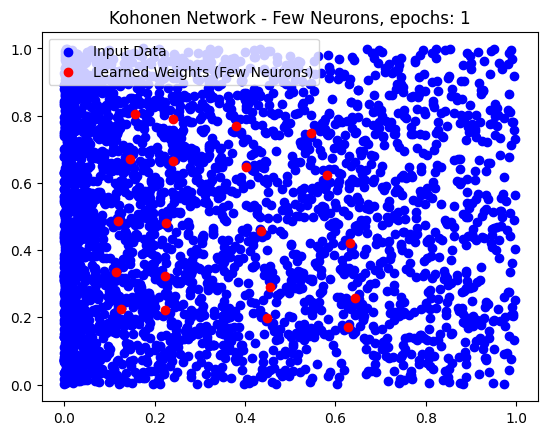

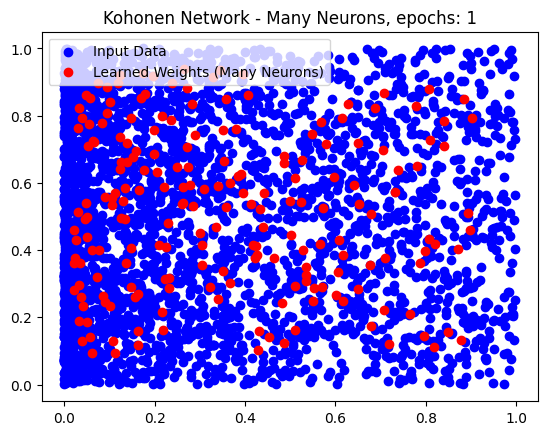

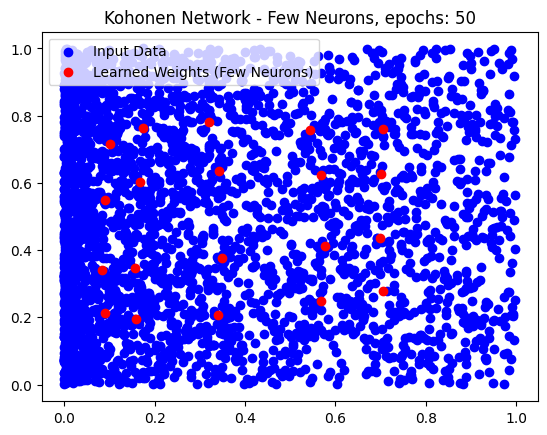

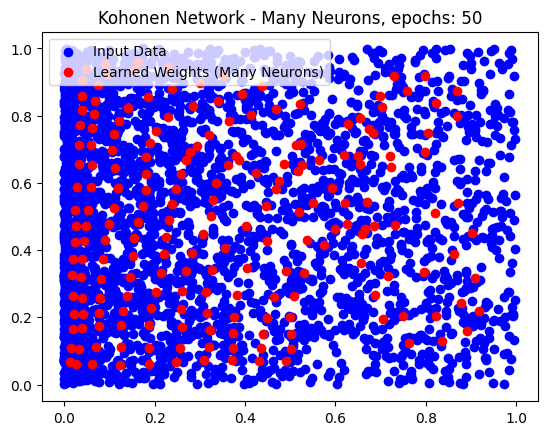

In [11]:
# Generate non-uniform distribution (Example 2)
x = np.random.uniform(size=3000)
y = np.random.uniform(size=3000)

input_data = np.column_stack((x**2, y))  # Squaring x to make the distribution non-uniform

# Rest of the code (same as before)
epochs = [1, 50]

for epoch in epochs:
    kohonen_few_neurons = Kohonen(map_shape=(4, 5), learning_rate=0.1, sigma=1.0)
    kohonen_few_neurons.train(input_data, num_epochs=epoch)
    weights_few_neurons = kohonen_few_neurons.get_weights()

    kohonen_many_neurons = Kohonen(map_shape=(20, 10), learning_rate=0.1, sigma=1.0)
    kohonen_many_neurons.train(input_data, num_epochs=epoch)
    weights_many_neurons = kohonen_many_neurons.get_weights()

    plt.scatter(input_data[:, 0], input_data[:, 1], color='blue', label='Input Data')
    plt.scatter(weights_few_neurons[:, :, 0], weights_few_neurons[:, :, 1], color='red', label='Learned Weights (Few Neurons)')
    plt.title(f'Kohonen Network - Few Neurons, epochs: {epoch}')
    plt.legend(loc='upper left')
    plt.show()

    plt.scatter(input_data[:, 0], input_data[:, 1], color='blue', label='Input Data')
    plt.scatter(weights_many_neurons[:, :, 0], weights_many_neurons[:, :, 1], color='red', label='Learned Weights (Many Neurons)')
    plt.title(f'Kohonen Network - Many Neurons, epochs: {epoch}')
    plt.legend(loc='upper left')
    plt.show()


### {(x, y)| 4<=x^2 + y^2<=16} - uniforn

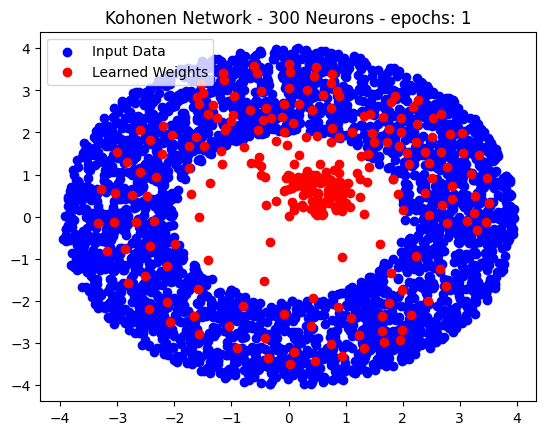

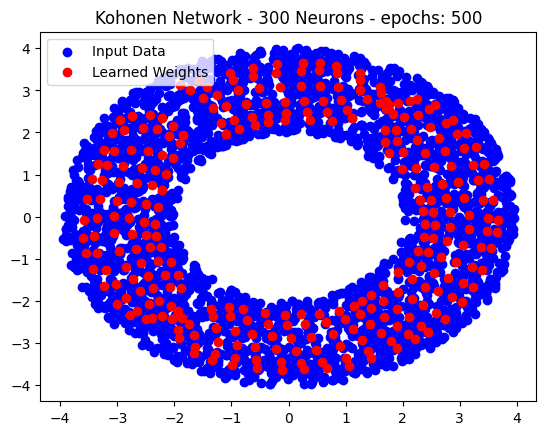

In [25]:
# Generate data within the annular region
epochs = [1, 500]
num_points = 3000

r1 = np.sqrt(np.random.uniform(size=num_points) * 12 + 4)
theta = np.random.uniform(low=0, high=2 * np.pi, size=num_points)
for epoch in epochs:
    x = r1 * np.cos(theta)
    y = r1 * np.sin(theta)

    input_data = np.column_stack((x, y))
    kohonen_many_neurons = Kohonen(map_shape=(50, 6), learning_rate=0.1, sigma=1.0)
    kohonen_many_neurons.train(input_data, num_epochs=epoch)
    weights_many_neurons = kohonen_many_neurons.get_weights()

    plt.scatter(input_data[:, 0], input_data[:, 1], color='blue', label='Input Data')
    plt.scatter(weights_many_neurons[:, :, 0], weights_many_neurons[:, :, 1], color='red', label='Learned Weights')
    plt.title(f'Kohonen Network - 300 Neurons - epochs: {epoch}')
    plt.legend(loc='upper left')
    plt.show()

### {(x, y)| 4<=x^2 + y^2<=16} - normal

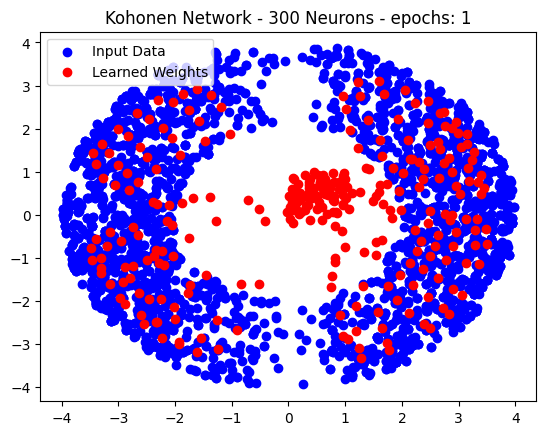

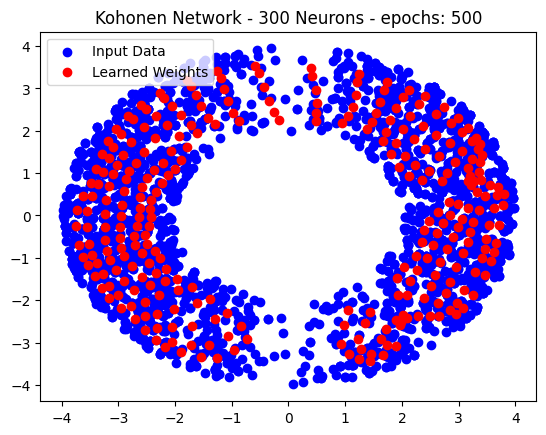

In [18]:
epochs = [1, 500]
num_points = 3000

r1 = np.sqrt(np.random.uniform(size=num_points) * 12 + 4)
theta = np.random.uniform(low=0, high=2 * np.pi, size=num_points)
for epoch in epochs:
    x = r1 * np.cos(theta)
    y = r1 * np.sin(theta)

    # Adjust the likelihood of picking a point based on the size of x-coordinate
    x_weights = np.abs(x) / np.max(np.abs(x))
    y_weights = np.ones_like(y)  # Uniform likelihood for y-coordinate

    weighted_points = np.column_stack((x_weights, y_weights))

    # Generate data based on the normalized weights
    indices = np.random.choice(range(num_points), size=num_points, p=weighted_points[:, 0] / np.sum(weighted_points[:, 0]))
    x_selected = x[indices]
    y_selected = y[indices]

    input_data = np.column_stack((x_selected, y_selected))
    kohonen_many_neurons = Kohonen(map_shape=(50, 6), learning_rate=0.1, sigma=1.0)
    kohonen_many_neurons.train(input_data, num_epochs=epoch)
    weights_many_neurons = kohonen_many_neurons.get_weights()

    plt.scatter(input_data[:, 0], input_data[:, 1], color='blue', label='Input Data')
    plt.scatter(weights_many_neurons[:, :, 0], weights_many_neurons[:, :, 1], color='red', label='Learned Weights')
    plt.title(f'Kohonen Network - 300 Neurons - epochs: {epoch}')
    plt.legend(loc='upper left')
    plt.show()


### {(x, y)| 4<=x^2 + y^2<=16} - binomial

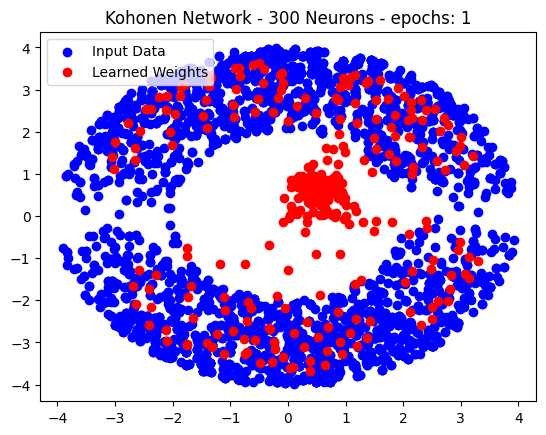

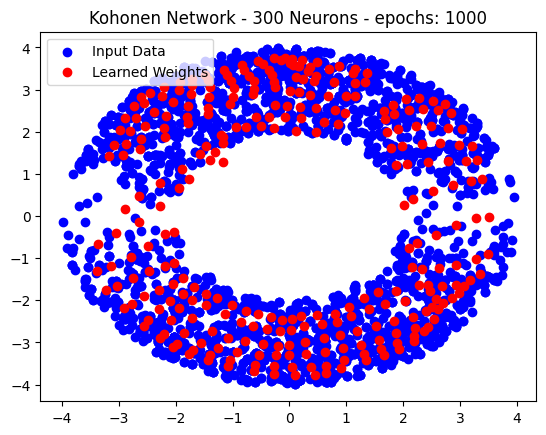

In [20]:
epochs = [1, 1000]
num_points = 3000

r1 = np.sqrt(np.random.uniform(size=num_points) * 12 + 4)
theta = np.random.uniform(low=0, high=2 * np.pi, size=num_points)
for epoch in epochs:
    x = r1 * np.cos(theta)
    y = r1 * np.sin(theta)

    # Adjust the likelihood of picking a point based on the size of y-coordinate
    x_weights = np.ones_like(x)  # Uniform likelihood for x-coordinate
    y_weights = np.abs(y) / np.max(np.abs(y))

    weighted_points = np.column_stack((x_weights, y_weights))

    # Generate data based on the normalized weights
    indices = np.random.choice(range(num_points), size=num_points, p=weighted_points[:, 1] / np.sum(weighted_points[:, 1]))
    x_selected = x[indices]
    y_selected = y[indices]

    input_data = np.column_stack((x_selected, y_selected))
    kohonen_many_neurons = Kohonen(map_shape=(50, 6), learning_rate=0.1, sigma=1.0)
    kohonen_many_neurons.train(input_data, num_epochs=epoch)
    weights_many_neurons = kohonen_many_neurons.get_weights()

    plt.scatter(input_data[:, 0], input_data[:, 1], color='blue', label='Input Data')
    plt.scatter(weights_many_neurons[:, :, 0], weights_many_neurons[:, :, 1], color='red', label='Learned Weights')
    plt.title(f'Kohonen Network - 300 Neurons - epochs: {epoch}')
    plt.legend(loc='upper left')
    plt.show()
